In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
from gendis.genetic import GeneticExtractor

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('data/sin_synth/SIN_FIXED_NONOISE_500.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,error,label
0,85.739247,1.344625,37.451670,26.843315,31.284170,-45.399383,14.300533,81.977677,-187.995462,-21.960071,...,-24.578258,103.211914,-14.518547,84.652062,7.953025,-120.718118,37.572022,120.889874,0.544000,0.0
1,-207.671318,-75.968150,33.158166,-29.512768,-164.005766,-126.672726,39.776650,-95.709632,-16.328996,-55.559408,...,-95.788062,70.440149,13.288579,120.328714,137.852343,145.181942,106.631722,-115.018158,0.535469,0.0
2,-132.060832,-45.206333,20.068966,-108.144891,103.378844,-5.526240,9.712645,23.641079,-78.266041,-113.073336,...,150.030863,61.051841,-54.133299,84.737563,-27.710857,104.115506,-77.853640,-254.261817,0.466362,0.0


In [5]:
df.error.describe()

count    500.000000
mean       0.697184
std        0.214817
min        0.247080
25%        0.492625
50%        0.720903
75%        0.900020
max        0.999381
Name: error, dtype: float64

In [6]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [7]:
len(df)

500

In [8]:
df = df.drop(columns='error')
#X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
X = df.drop(columns=['label'])
y = df['label']

In [9]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [10]:
from gendis.fitness import logloss_fitness

args = {
    "dist_function": "original",
    "fitness": logloss_fitness,
    "apply_differencing": False,
    "population_size": 100,
    "max_shaps": 5,
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [11]:
gendis.__dict__

{'dist_function': <cyfunction _pdist at 0x79cb74a4dba8>,
 'dist_func_returns': False,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False)>,
 'apply_differencing': False,
 'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.ope

In [12]:
%%time
gendis.fit(X_train, y_train)

it		avg		std		max		time
1		-0.0305		0.089		-3e-06	1.5513
2		-0.0028		0.021		-3e-06	2.1214
3		-0.0		0.0		-2e-06	2.2415
4		-0.0		0.0		-2e-06	2.8301
5		-0.0		0.0		-2e-06	2.6151
6		-0.0		0.0		-2e-06	2.4936
7		-0.0		0.0		-2e-06	3.4266
8		-0.0		0.0		-1e-06	5.3326
9		-0.0		0.0		-1e-06	3.4461
10		-0.0		0.0		-1e-06	4.2542
11		-0.0		0.0		-1e-06	4.9643
12		-0.0		0.0		-1e-06	4.7803
13		-0.0		0.0		-1e-06	4.7979
14		-0.0		0.0		-1e-06	5.2206
15		-0.0		0.0		-1e-06	4.8405
16		-0.0		0.0		-1e-06	4.8028
17		-0.0		0.0		-1e-06	4.7074
18		-0.0		0.0		-1e-06	4.6005
19		-0.0		0.0		-1e-06	4.646
20		-0.0		0.0		-1e-06	4.7427
21		-0.0		0.0		-1e-06	4.7879
22		-0.0		0.0		-1e-06	4.6025
23		-0.0		0.0		-1e-06	4.7029
24		-0.0		0.0		-1e-06	5.3818
25		-0.0		0.0		-1e-06	5.2327
26		-0.0		0.0		-1e-06	5.3802
27		-0.0		0.0		-1e-06	5.9207
28		-0.0		0.0		-1e-06	5.8475
29		-0.0		0.0		-1e-06	6.2714
30		-0.0		0.0		-1e-06	5.9282
31		-0.0		0.0		-0.0	5.4139
32		-0.0		0.0		-0.0	5.5133
33		-0.0		0.0		-0.0	6.407
34		-0.0		0.0		-0.0	5.7109

In [13]:
%%time
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 4.35 s, sys: 0 ns, total: 4.35 s
Wall time: 4.35 s


In [14]:
dists = pd.DataFrame(distances_train)
dists.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,20.915398,33.785530,15.319988,32.247929,32.924217,35.880516,20.910843,32.882019,21.074575,322.441833,37.664562,36.440983,36.454952,36.454948
1,20.915398,33.785530,15.319988,32.247929,32.924217,35.880516,20.910843,32.882019,21.074575,309.450745,37.664562,36.440983,36.454952,36.454948
2,211.158142,319.346100,42.706272,318.692474,319.510193,317.299011,211.153107,319.525513,211.312286,267.326416,333.879364,317.039917,316.980804,316.980804
3,298.441559,369.176422,47.880577,367.580902,368.930389,362.563385,298.441345,368.919556,298.441925,349.464600,391.459503,362.020172,361.987061,361.987061
4,20.915398,33.785530,15.319988,32.247929,32.924217,35.880516,20.910843,32.882019,21.074575,282.224518,37.664562,36.440983,36.454952,36.454948


In [15]:
dists["label"] = y_train.values
dists["label"].value_counts()
dists.index = X_train.index
#dists[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

In [16]:
def test_shapelet_separation(shap, shap_id):
    axs_multiplier = 0.75
    f, axs = plt.subplots(1, 2, figsize=(2*axs_multiplier*6.4, axs_multiplier*4.8))
    print(f"Testing separation for shapelet {shap_id}")
    
    # Shapelet plot
    axs[0].plot(shap)
    
    # Distance histograms plot
    bins = np.linspace(0, 120, 20)
    axs[1].hist(dists.loc[dists['label']==0, shap_id], alpha=0.5, label='sin=false')
    axs[1].hist(dists.loc[dists['label']==1, shap_id], alpha=0.5, label='sin=true')
    axs[1].legend(loc='upper right')
    
    # Distance versus sin_y
    #dists.plot.scatter(x='sin_y', y=shap_id, c='DarkBlue', ax=axs[2])
    
    
    # Accuracy using the shapelet as feature
    single_shapelet_train = distances_train[:, shap_id].reshape(-1, 1)
    single_shapelet_test = distances_test[:, shap_id].reshape(-1, 1)
    
    lr = LogisticRegression()
    lr.fit(single_shapelet_train, y_train)
    y_pred = lr.predict(single_shapelet_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy = {acc}')
    print(confusion_matrix(y_test, y_pred))
    
    plt.show()

Testing separation for shapelet 0
Accuracy = 1.0
[[200   0]
 [  0 200]]


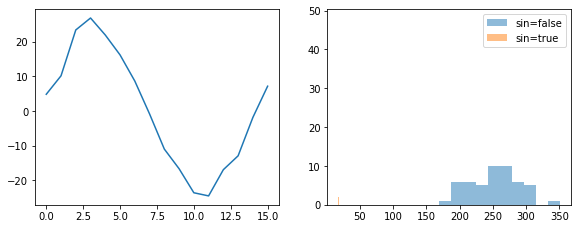

Testing separation for shapelet 1
Accuracy = 1.0
[[200   0]
 [  0 200]]


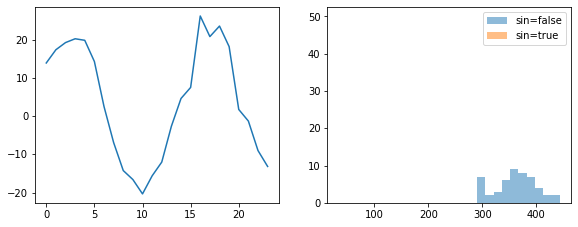

Testing separation for shapelet 2
Accuracy = 0.99
[[196   4]
 [  0 200]]


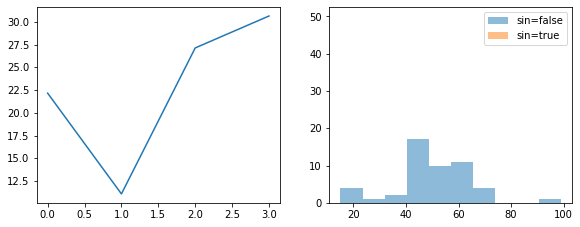

Testing separation for shapelet 3
Accuracy = 1.0
[[200   0]
 [  0 200]]


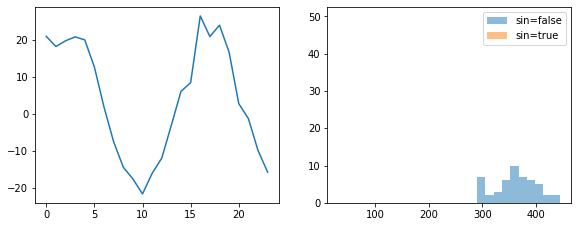

Testing separation for shapelet 4
Accuracy = 1.0
[[200   0]
 [  0 200]]


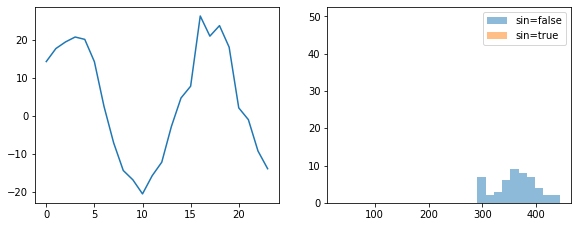

Testing separation for shapelet 5
Accuracy = 1.0
[[200   0]
 [  0 200]]


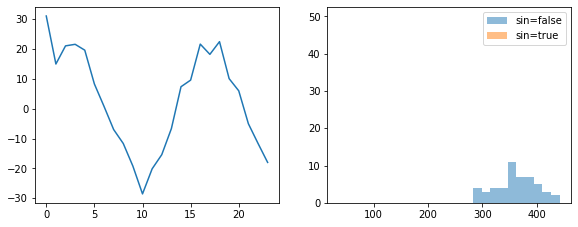

Testing separation for shapelet 6
Accuracy = 1.0
[[200   0]
 [  0 200]]


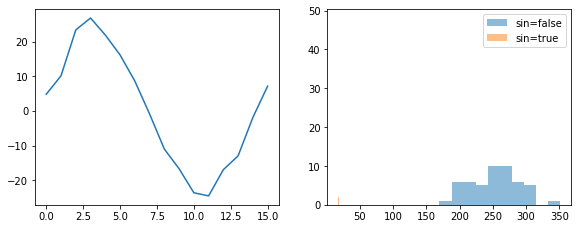

Testing separation for shapelet 7
Accuracy = 1.0
[[200   0]
 [  0 200]]


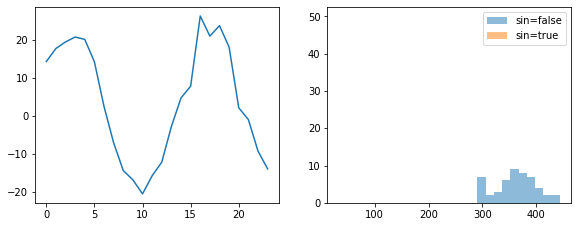

Testing separation for shapelet 8
Accuracy = 1.0
[[200   0]
 [  0 200]]


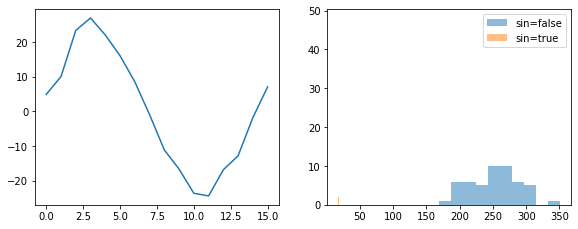

Testing separation for shapelet 9
Accuracy = 0.5175
[[117  83]
 [110  90]]


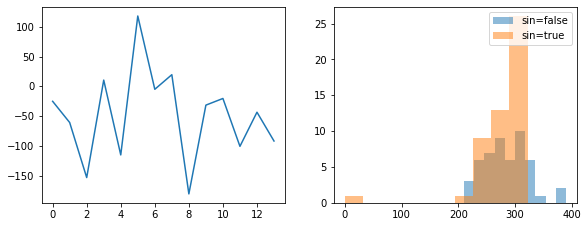

Testing separation for shapelet 10
Accuracy = 1.0
[[200   0]
 [  0 200]]


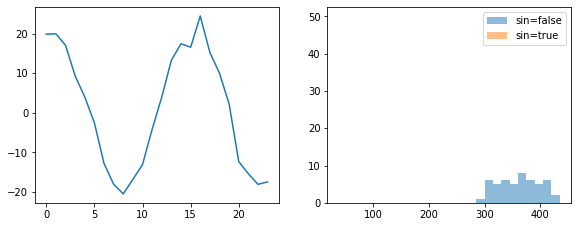

Testing separation for shapelet 11
Accuracy = 1.0
[[200   0]
 [  0 200]]


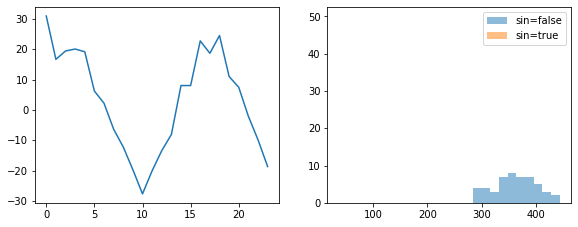

Testing separation for shapelet 12
Accuracy = 1.0
[[200   0]
 [  0 200]]


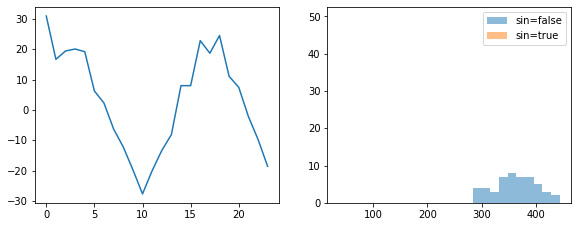

Testing separation for shapelet 13
Accuracy = 1.0
[[200   0]
 [  0 200]]


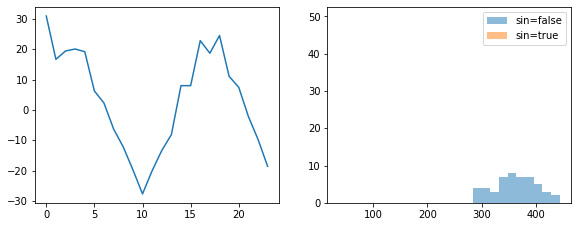

In [17]:
for i, shap in enumerate(gendis.best['shapelets'], start=0):
    test_shapelet_separation(shap, i)

### Persistence of results

In [ ]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = './test_sin_results/'
os.makedirs(folder, exist_ok=True)

dists.to_csv(f'{folder}/test_sin_500_fixed_nonoise_distmatrix_{ts}.csv', header=False, index=False)


with open(f'{folder}/gendis_{ts}.pickle', 'wb') as file_handler:
    pickle.dump(gendis, file_handler, protocol=pickle.HIGHEST_PROTOCOL)